## Project 2 - Kaggle Challenges with Titanic Survival - Classification, and House Prices - Regression

## Part 2: Machine Learning from Disaster

_Team numbers: 10_

_Team members: Maha Aldosary - Noha Zamaan - Mariah Alshiekh(leader)_

---

### Contents:
- [Problem Statment](#Problem-Statment)
- [Kaggle Linke](#Kaggle-Link)
- [Load Required Packages](#Load-Required-Packages)
- [Data Import and Description](#Data-Import-and-Description)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualization](#Data-Visualization)
- [Modelling](#Modelling)
- [Conclusion](#Conclusion)

### Problem Statment
 “what sorts of people were more likely to survive?”
##### Does it require a classification, regression or clustering based solution?
Titanic data has verity of features that describe the satuation in titanic ship. most of these features have object type. 
So, classification model works perfectly with these data and we applied multiable kind of classfication model in order to select the model that provide best score.

---


### Kaggle Link
We Worked on three strategies :

1- First stratiges : Fill missing value with (mean and mod) method [here](https://www.kaggle.com/mariahalshiekh/project-taitanic)

2- Second stratiges: Fill missing value using Random Foreset [here](https://www.kaggle.com/mariahalshiekh/project-titanic-rf-clean)

3- Third stratiges : Fill missing value using Knn classifier [here](https://www.kaggle.com/mariahalshiekh/project-taitanic-knn-clean)

### Load Required Packages

In [64]:
#identify the libraries that used on the hole code
import pandas as pd
import numpy as np
# this is for ploting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
#this is for modeling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Data Import and Description

[train_data: ](https://www.kaggle.com/c/titanic/data?select=train.csv)will contain the details of a subset of the passengers and importantly, will reveal whether they survived or not, also known as the “ground truth”.

[test_data:](https://www.kaggle.com/c/titanic/data?select=test.csv) dataset contains similar information but does not disclose the “ground truth” for each passenger. 

In [65]:
#load train and test datset and assign them to appropriately named pandas dataframes 
train_data=pd.read_csv('./train.csv')
test_data=pd.read_csv('./test.csv')
sample_data=pd.read_csv('./gender_submission.csv')

#### Display data

In [66]:
#explor train_data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
#explor test_data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Briefly describe the data

|Feature|Type|Description|
|---|---|---|
|PassengerId|int64|ID
|survival|int64|Survival	0 = No, 1 = Yes|
|pclass|int64|Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|object|Passenger name|
|sex	| object       |Sex	|
|Age	|float64|Age in years	|
|sibsp|int64| of siblings / spouses aboard the Titanic	|
|parch|int64|of parents / children aboard the Titanic	|
|ticket|object|Ticket number	|
|fare|float64|	Passenger fare	|
|cabin|object|	Cabin number	|
|embarked|object|	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|

#### Exploring and Describing the data


In [68]:
#explore information of each columns in train and test data
train_data.info()
print('-------------------------------------')
test_data.info()
print('-------------------------------------')
#display the shape of train and test data
print('Shape of train data: ',train_data.shape)
print('Shape of test  data: ',test_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId 

#### Summary statistics.

In [69]:
#display the summary statistics of train dataset
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
#display the summary statistics of test dataset
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


---
### Data Cleaning

In [71]:
#we want to check the train_data columns
train_data.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
#we want to check the test_data columns
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
#check the type of each columns on train_data columns
train_data.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [74]:
#check the type of each columns on test_data columns
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [75]:
#searching for missing values in trian_data
# we want to check about null value for each feature in train data
print(f"Shows missing values in trian_data :\n{train_data.isnull().sum()} ")

Shows missing values in trian_data :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 


**From this quick look, we notice that there are missing data in each of the following columns:**
- Age -> 177 missing values.
- Cabine -> 687 missing values.
- Embarked  -> 2 missing values.

In [76]:
# fill Embarked missing value by using mode
#first : determent which missing value 
print(f"Shows missing values in Embarked feature :\n{train_data.Embarked.isnull().sum()} ")
train_data.Embarked.value_counts()
# we noticed that 'S' has a proyrity 

Shows missing values in Embarked feature :
2 


S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Since the missing values in this column are only 2, they do not significantly affect our data. Therefore, we prefer to add it to the most frequent values in this column, and from the previous observation, we find that 'S' is the most frequent value. So we will use "mode" to handle it**

In [77]:
# handling missing value in training data
# fill the missing value with 's' value because it is a mode 
train_data.Embarked.fillna(value=train_data['Embarked'].mode()[0], inplace=True)
print("Shows missing values in trian_data :\n ")
train_data.isnull().sum()
#ckeck again about missing value to be sure Embarked has 0 null value 

Shows missing values in trian_data :
 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [78]:
train_data.Embarked.value_counts()#check values after treated

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [79]:
#check 'Cabin' datatyp after converted it
train_data[['Cabin']] =train_data[['Cabin']].apply(np.int64)

ValueError: cannot convert float NaN to integer

In [80]:
# determent which missing value on Cabin column.
print(f"Shows missing values in Cabin feature :\n{train_data.Cabin.isnull().sum()} ")

Shows missing values in Cabin feature :
687 


**Cabin features have 687 missing data, which is a large number, but since the missing cabin data indicates that it does not exist, so we will express the available cabin assign 1 and the unknown cabin 0**

In [81]:
# we will deal with Cabin missing value in train data
#we will treat cabin as if it is unknown we will assign 0, if not will fill it by 1  
train_data['Cabin']=train_data['Cabin'].map(lambda x: 0 if x == np.nan else 1)
print("Shows missing values in train data  :\n ")
train_data.isnull().sum()

Shows missing values in train data  :
 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [82]:
# determent which missing value on Age column.
print(f"Shows missing values in Age feature :\n{train_data.Age.isnull().sum()} ")

Shows missing values in Age feature :
177 


In [83]:
# now wa deal with missing value in Age by using machine learning (Random Forest)
#1- we devided the train data to two data set depending in Age value
titanicWithAge = train_data[pd.isnull(train_data['Age']) == False] #dataset has Age value
titanicWithoutAge = train_data[pd.isnull(train_data['Age'])]#dataset has null value in Age column



In [84]:
variables = ['PassengerId','Name','Survived','Pclass', 'SibSp', 'Parch','Ticket', 'Fare', 'Age','Cabin']
#save the columns name to list


### Data Preprocessing and Feature Engineering

In [85]:
#using dummys to convert the values of Embarked and Sex columns into numorics (0,1)
one_hot_encoded_embarked = pd.get_dummies(titanicWithAge['Embarked'],drop_first=True)#drop the first column after convert it
one_hot_encoded_sex = pd.get_dummies(titanicWithAge['Sex'],drop_first=True)# do the same in Sex column
titanicWithAge = titanicWithAge[variables]# add the rest of columns to the dataset 
titanicWithAge = pd.concat([titanicWithAge, one_hot_encoded_sex, one_hot_encoded_embarked], axis = 1)# connect the 3 dataset together
# now we did the same in other dataset 'titanicWithoutAge'
one_hot_encoded_embarked = pd.get_dummies(titanicWithoutAge['Embarked'],drop_first=True)
one_hot_encoded_sex = pd.get_dummies(titanicWithoutAge['Sex'],drop_first=True)
titanicWithoutAge = titanicWithoutAge[variables]
titanicWithoutAge = pd.concat([titanicWithoutAge, one_hot_encoded_sex, one_hot_encoded_embarked], axis = 1)


In [86]:
titanicWithAge.head()# show a head of data to display the result

,PassengerId,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Age,Cabin,male,Q,S
0,1,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,22.0,1,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,38.0,1,0,0,0
2,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,26.0,1,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,35.0,1,0,0,1
4,5,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,35.0,1,1,0,1


In [87]:
titanicWithoutAge.head()# show a head of data to display the result

,PassengerId,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Age,Cabin,male,Q,S
5,6,"Moran, Mr. James",0,3,0,0,330877,8.4583,NaN,1,1,1,0
17,18,"Williams, Mr. Charles Eugene",1,2,0,0,244373,13.0000,NaN,1,1,0,1
19,20,"Masselmani, Mrs. Fatima",1,3,0,0,2649,7.2250,NaN,1,0,0,0
26,27,"Emir, Mr. Farred Chehab",0,3,0,0,2631,7.2250,NaN,1,1,0,0
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,3,0,0,330959,7.8792,NaN,1,0,1,0


In [88]:
# now we strat identify the random forst model
independentVariables = ['PassengerId','Pclass','SibSp','Parch','Fare','Cabin','male', 'Q','S']# using these columns as X-train

rfModel_age = RandomForestRegressor()
rfModel_age.fit(titanicWithAge[independentVariables], titanicWithAge['Age'])# Age column likes y_train

generatedAgeValues = rfModel_age.predict(X = titanicWithoutAge[independentVariables]) #generate value of Age

In [89]:
titanicWithoutAge['Age'] = generatedAgeValues.astype(int)# convert to the result to int
train_data = titanicWithAge.append(titanicWithoutAge)# fill the new value to the main dataset 'train_data'


In [90]:
train_data.reset_index(inplace=True) # reset the index 
train_data.drop('index',inplace=True,axis=1) # after drop the index column


In [91]:
train_data.isnull().sum()#check to be sure the null value is gone

PassengerId    0
Name           0
Survived       0
Pclass         0
SibSp          0
Parch          0
Ticket         0
Fare           0
Age            0
Cabin          0
male           0
Q              0
S              0
dtype: int64

In [92]:
train_data.head()# now we have train_data with out any null value

,PassengerId,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Age,Cabin,male,Q,S
0,1,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,7.2500,22.0,1,1,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,38.0,1,0,0,0
2,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,26.0,1,0,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,35.0,1,0,0,1
4,5,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,35.0,1,1,0,1


In [93]:
test_data.isnull().sum()# Ok time to treat test data and we did the same approach

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [94]:
# Second: we will deal with Cabin missing value in train data
#we will treat cabin as if it is unknown we will assign 0, if not will fill it by 1  
test_data['Cabin']=test_data['Cabin'].map(lambda x: 0 if x == np.nan else 1)
print("Shows missing values in test data  :\n ")
test_data.isnull().sum()

Shows missing values in test data  :
 


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [95]:
# we want to look for 'Pclass' that contains missing value in 'Fare'
test_data[test_data.Fare.isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,1,S


In [96]:
# As we see the number of missing value in 'Fare' just one in Pclass 3 , so it doesn't effect on our data. 
#Therfore, we prefer using 'mean'
# method to fill it with 
Fare_mean=test_data[test_data.Pclass==3]['Fare'].mean()
test_data.Fare.fillna(value=Fare_mean, inplace=True)

print("Shows missing values in test data  :\n ")
test_data.isnull().sum()


Shows missing values in test data  :
 


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [97]:
# do what we did before in train_data in Age column but now in test data
titanicWithAge = test_data[pd.isnull(test_data['Age']) == False]
titanicWithoutAge = test_data[pd.isnull(test_data['Age'])]

In [98]:
variables_test = ['PassengerId','Name','Pclass', 'SibSp', 'Parch','Ticket', 'Fare', 'Age','Cabin']

In [99]:
#apply dummy approach in 'Embarked' and 'Sex' columns
one_hot_encoded_embarked = pd.get_dummies(titanicWithAge['Embarked'],drop_first=True)
one_hot_encoded_sex = pd.get_dummies(titanicWithAge['Sex'],drop_first=True)

titanicWithAge = titanicWithAge[variables_test]
titanicWithAge = pd.concat([titanicWithAge, one_hot_encoded_sex, one_hot_encoded_embarked], axis = 1)

one_hot_encoded_embarked = pd.get_dummies(titanicWithoutAge['Embarked'],drop_first=True)
one_hot_encoded_sex = pd.get_dummies(titanicWithoutAge['Sex'],drop_first=True)
titanicWithoutAge = titanicWithoutAge[variables_test]
titanicWithoutAge = pd.concat([titanicWithoutAge, one_hot_encoded_sex, one_hot_encoded_embarked], axis = 1)


In [100]:
titanicWithAge.head()

,PassengerId,Name,Pclass,SibSp,Parch,Ticket,Fare,Age,Cabin,male,Q,S
0,892,"Kelly, Mr. James",3,0,0,330911,7.8292,34.5,1,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",3,1,0,363272,7.0000,47.0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",2,0,0,240276,9.6875,62.0,1,1,1,0
3,895,"Wirz, Mr. Albert",3,0,0,315154,8.6625,27.0,1,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,1,1,3101298,12.2875,22.0,1,0,0,1


In [101]:
titanicWithoutAge.head()

,PassengerId,Name,Pclass,SibSp,Parch,Ticket,Fare,Age,Cabin,male,Q,S
10,902,"Ilieff, Mr. Ylio",3,0,0,349220,7.8958,NaN,1,1,0,1
22,914,"Flegenheim, Mrs. Alfred (Antoinette)",1,0,0,PC 17598,31.6833,NaN,1,0,0,1
29,921,"Samaan, Mr. Elias",3,2,0,2662,21.6792,NaN,1,1,0,0
33,925,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",3,1,2,W./C. 6607,23.4500,NaN,1,0,0,1
36,928,"Roth, Miss. Sarah A",3,0,0,342712,8.0500,NaN,1,0,0,1


In [102]:
# using Random Forest Approach to fill missing value in Age column in test_data
independentVariables = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Cabin','male', 'Q', 'S']

rfModel_age = RandomForestRegressor()
rfModel_age.fit(titanicWithAge[independentVariables], titanicWithAge['Age'])

generatedAgeValues = rfModel_age.predict(X = titanicWithoutAge[independentVariables])

In [103]:
titanicWithoutAge['Age'] = generatedAgeValues.astype(int)# convert the type of age
test_data = titanicWithAge.append(titanicWithoutAge)


In [104]:
test_data.reset_index(inplace=True)# reset the index and drop the index 
test_data.drop('index',inplace=True,axis=1)


In [105]:
test_data.isnull().sum() # check about null value in test data

PassengerId    0
Name           0
Pclass         0
SibSp          0
Parch          0
Ticket         0
Fare           0
Age            0
Cabin          0
male           0
Q              0
S              0
dtype: int64

In [106]:
test_data.head() # show the test_data after treating missing values in columns

,PassengerId,Name,Pclass,SibSp,Parch,Ticket,Fare,Age,Cabin,male,Q,S
0,892,"Kelly, Mr. James",3,0,0,330911,7.8292,34.5,1,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",3,1,0,363272,7.0000,47.0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",2,0,0,240276,9.6875,62.0,1,1,1,0
3,895,"Wirz, Mr. Albert",3,0,0,315154,8.6625,27.0,1,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,1,1,3101298,12.2875,22.0,1,0,0,1


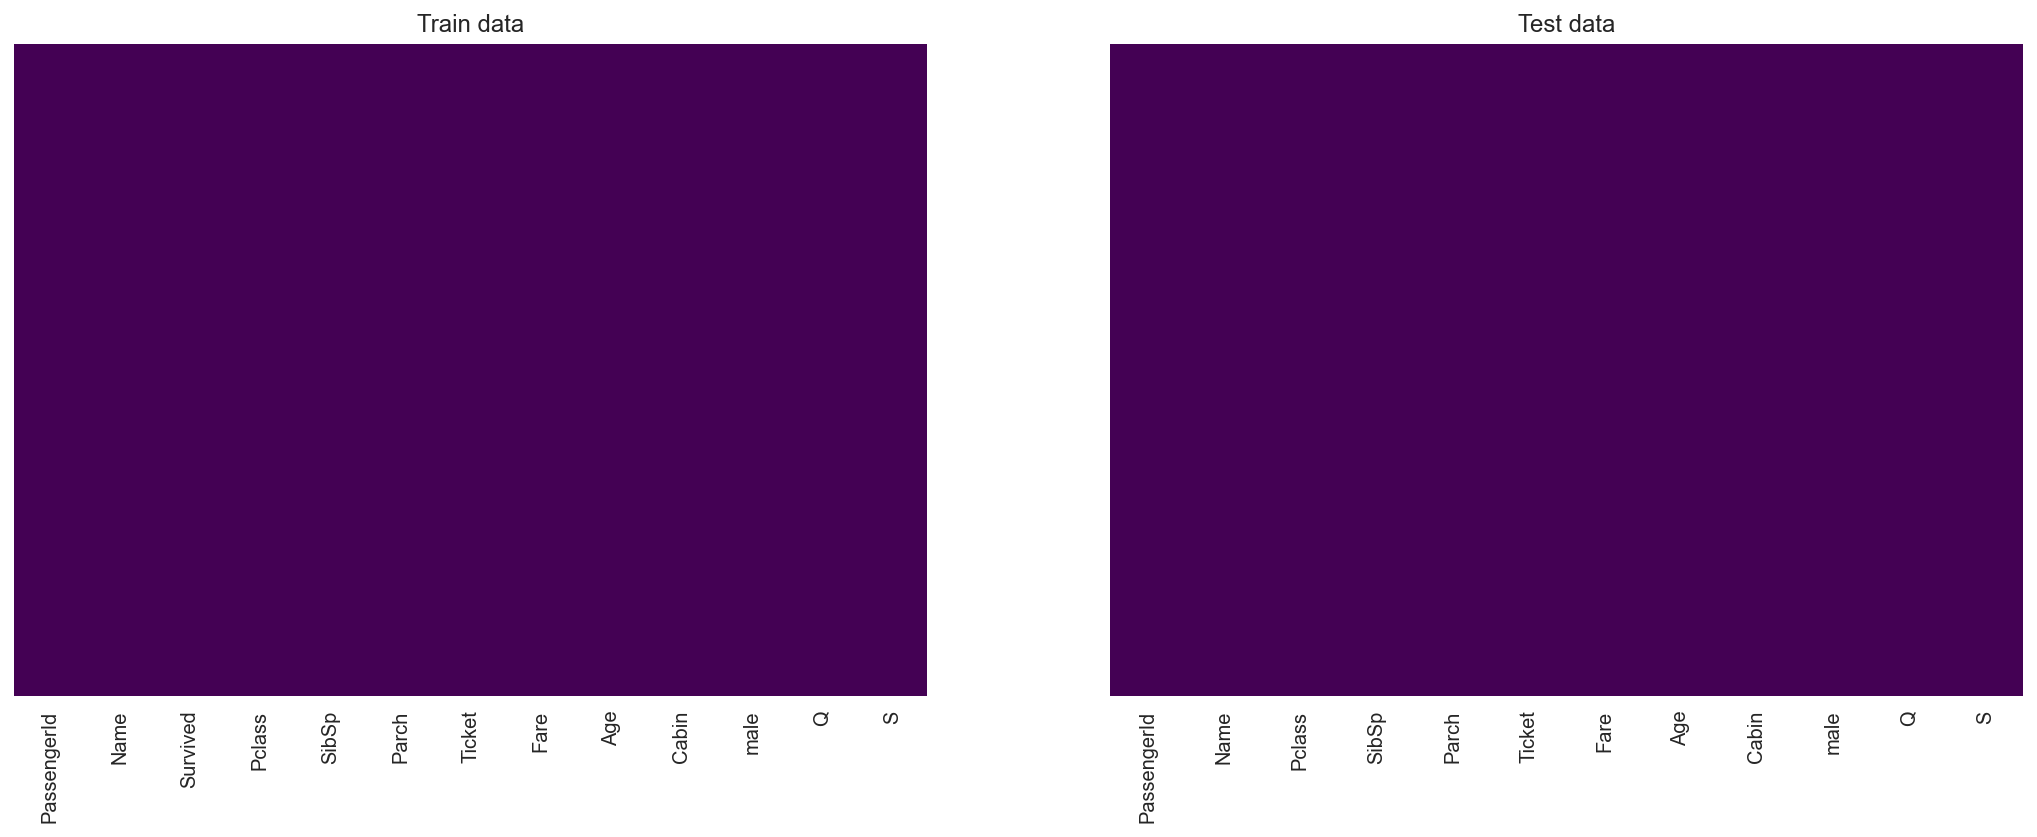

In [107]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
# train data 
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

---

#### Preparing for Visualisition
Identify the type of every variable (continuous or categorical)

In [108]:
# we divide the features to two categories numorics and categoricals
continuous_columns= ['Age','SibSp','Parch','Fare']
categorical_columns=['Pclass','Sex_male','Cabin','Embarked_Q','Embarked_S','Survived']
# print both lists
print('continue  features : ', continuous_columns)
print('categorize  features : ', categorical_columns)

continue  features :  ['Age', 'SibSp', 'Parch', 'Fare']
categorize  features :  ['Pclass', 'Sex_male', 'Cabin', 'Embarked_Q', 'Embarked_S', 'Survived']


In [109]:
categorical_columns=train_data[['Pclass','male','Cabin','Q','S','Survived']]
# create data frame contais categorical_columns

### Data Visualization
#### Univariate Analysis:

1- Train data


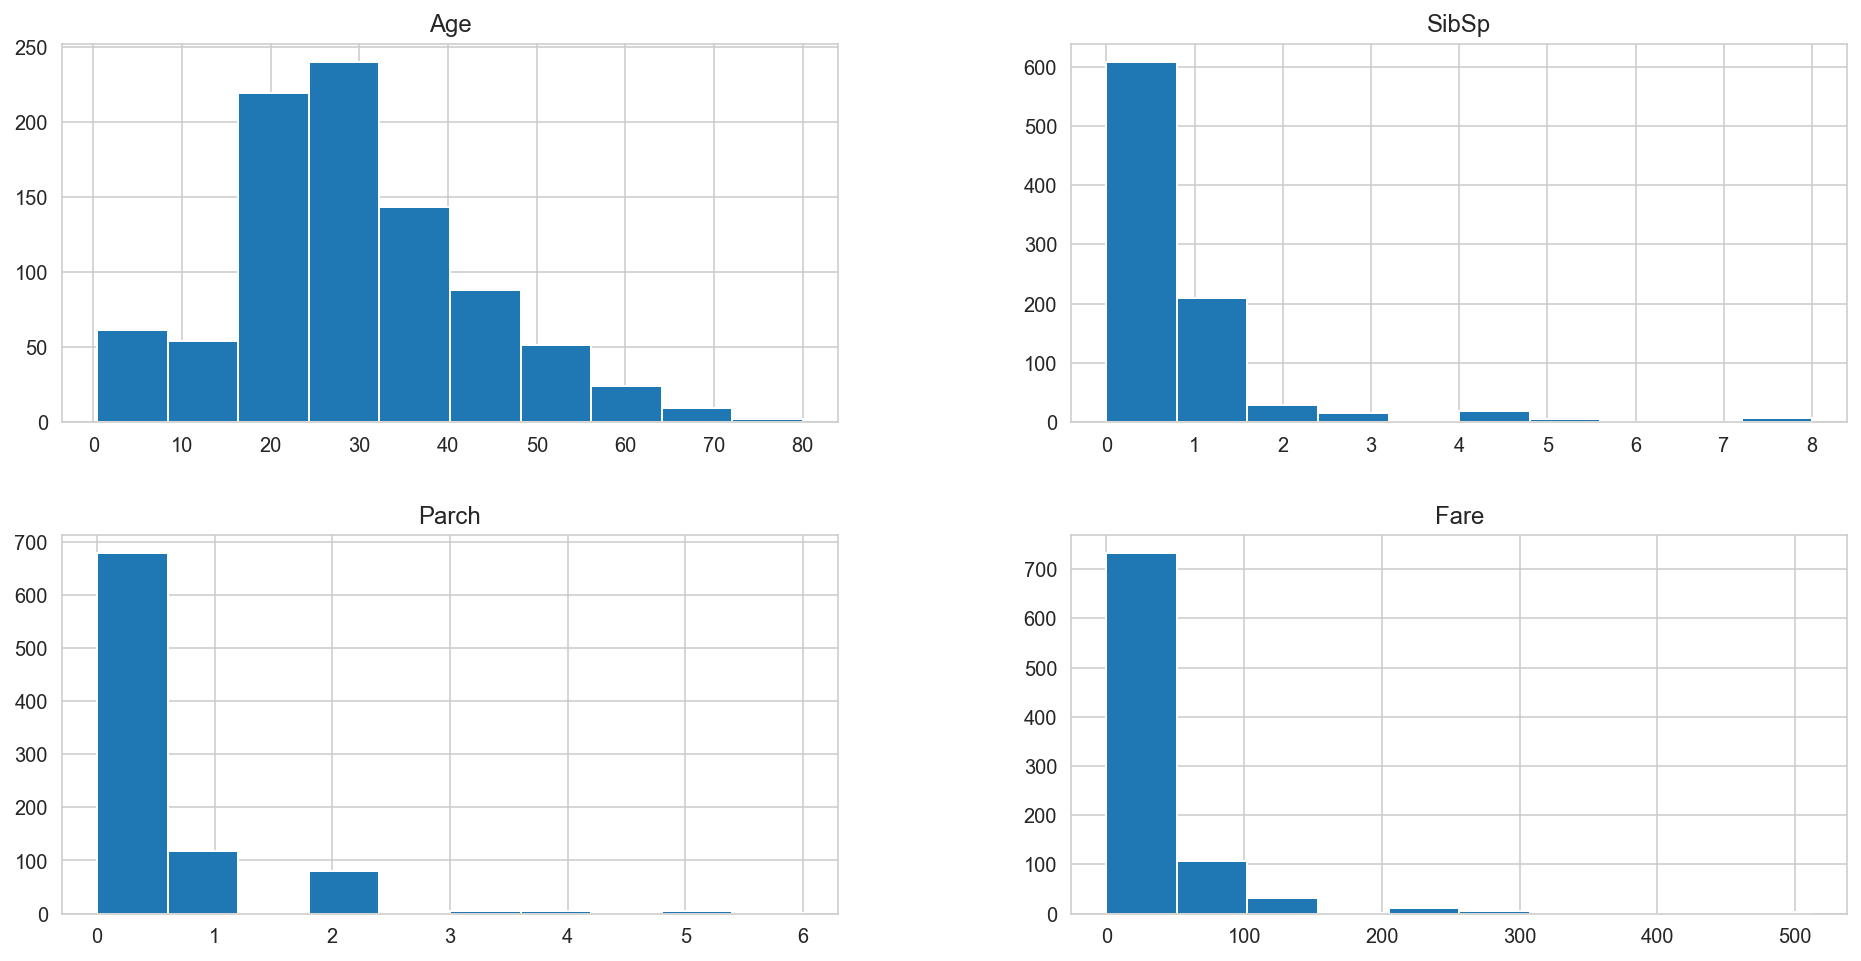

In [110]:
train_data.hist(column=continuous_columns, figsize=(16,8)); #histograme for each column in continuous_columns 

**we note the continuous variables on train taitanic dataset is unnormall distrbution. It is trend to positive skew.**


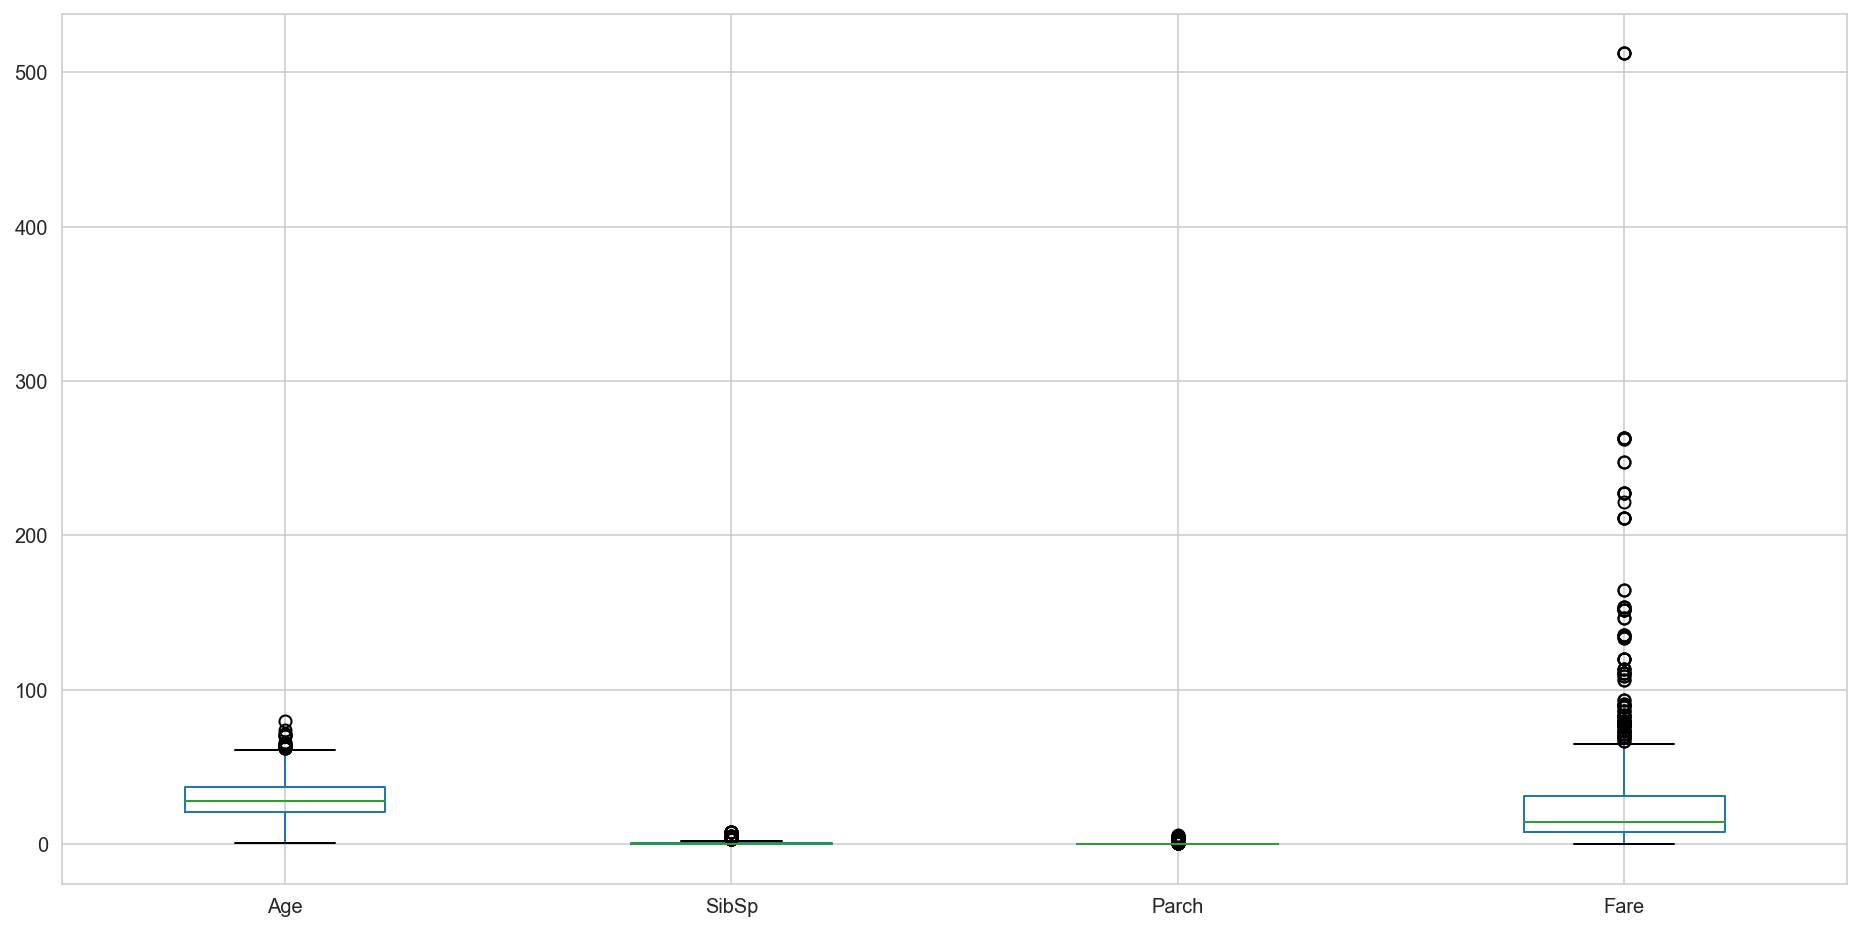

In [111]:
train_data.boxplot(column=continuous_columns, figsize=(16,8));# did boxpot to show outlire 

**We note that there are alot of outliers spesfically on 'Age' and 'Fare' features.**

2- Test data

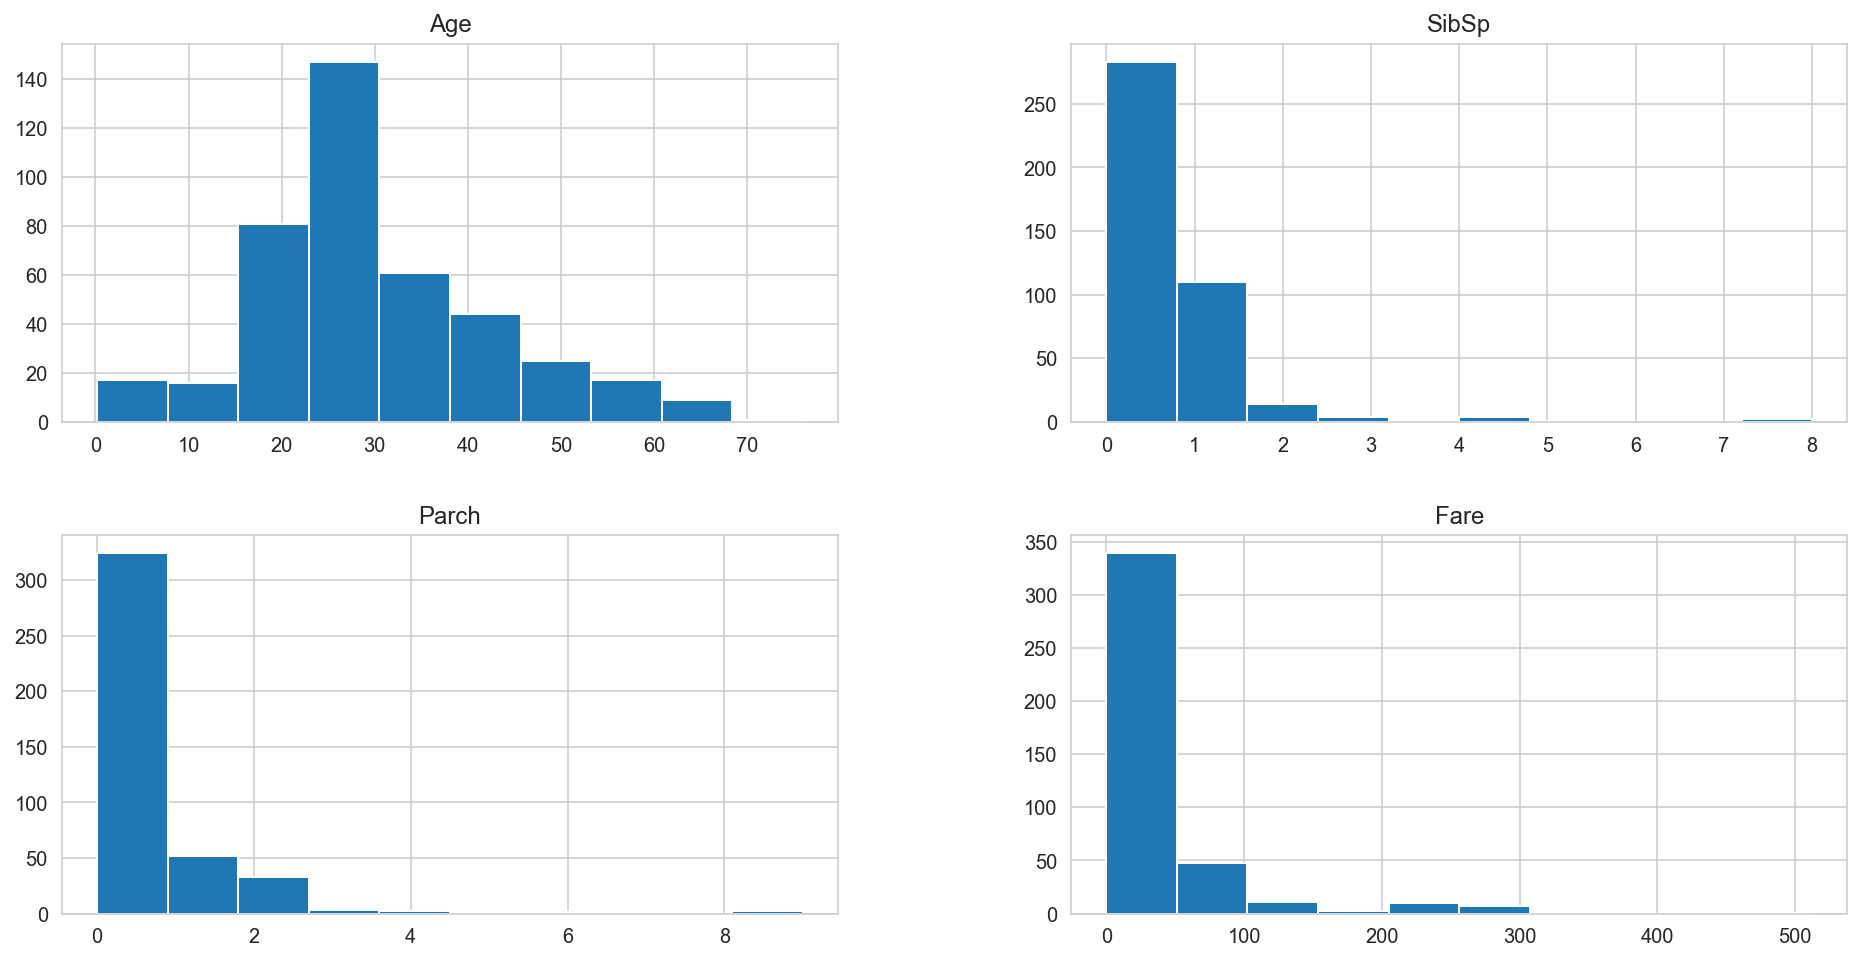

In [112]:
test_data.hist(column=continuous_columns, figsize=(16,8));# did histogram again but to test data

**We note the continuous variables on test taitanic dataset is unnormall distrbution. It is trend to positive skew.**

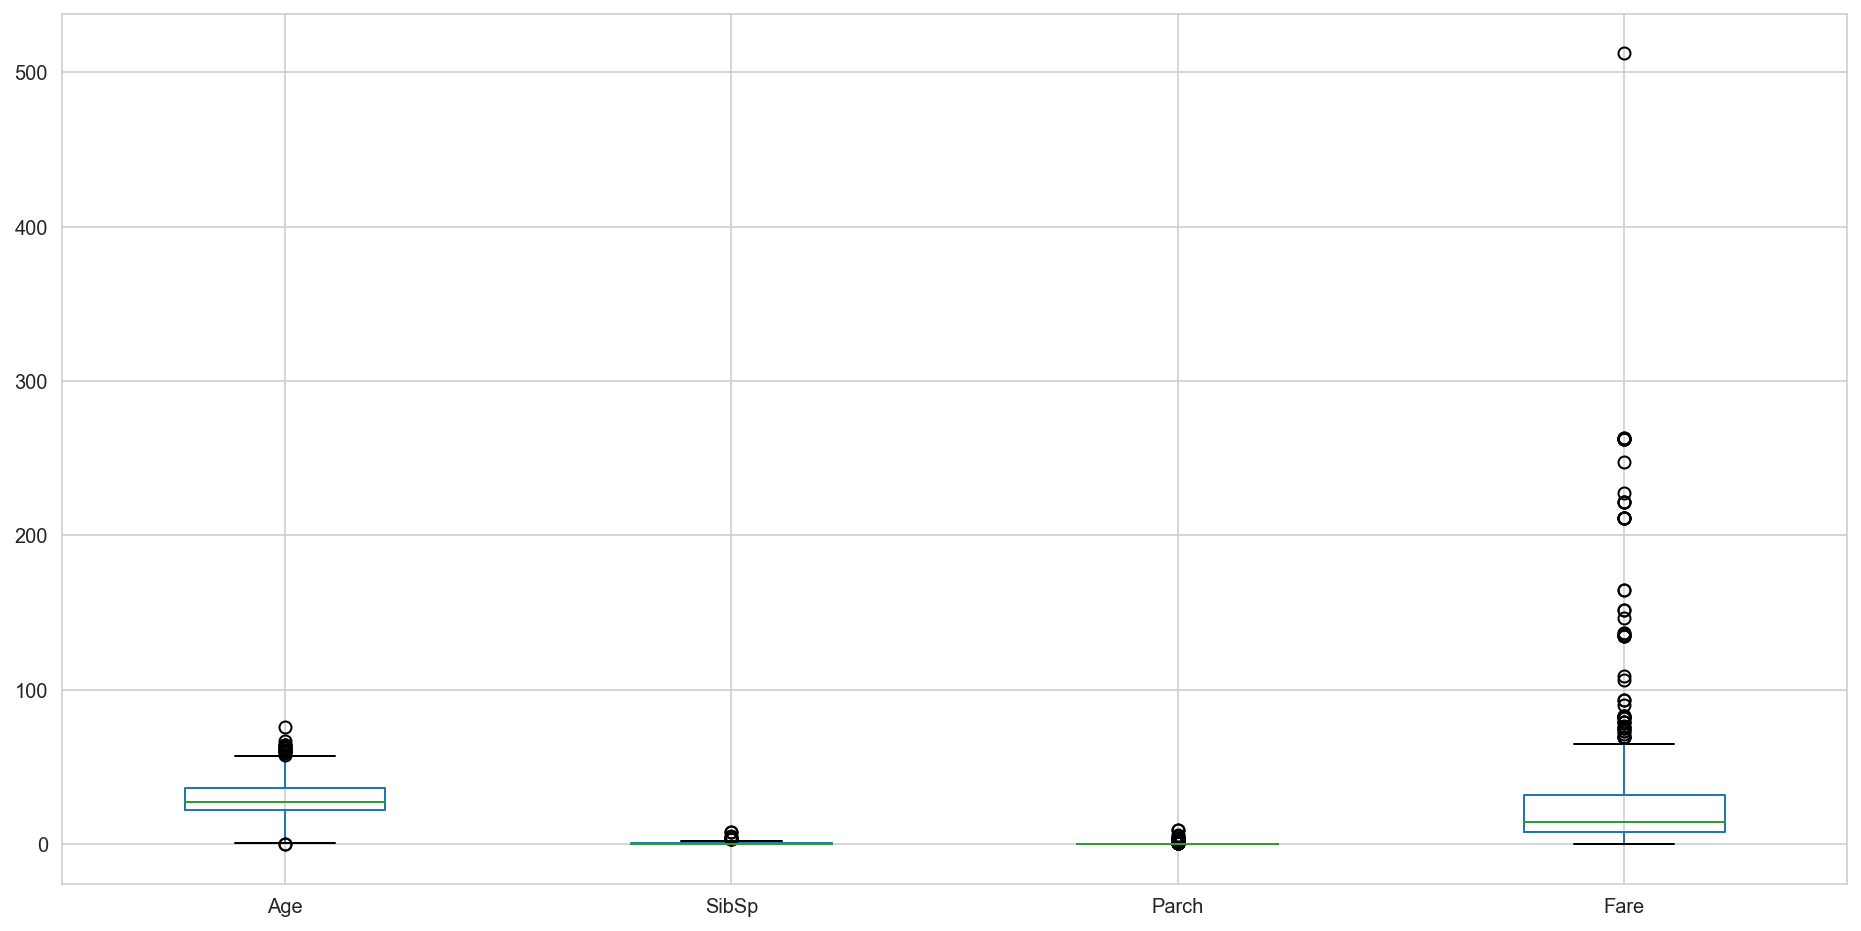

In [113]:
test_data.boxplot(column=continuous_columns, figsize=(16,8));# did boxplot to show outlire

**As above char showung there are alot of outliers spesfically on'Age' and 'Fare' features.** 

#### visualize catigraical  features

1-Train Data

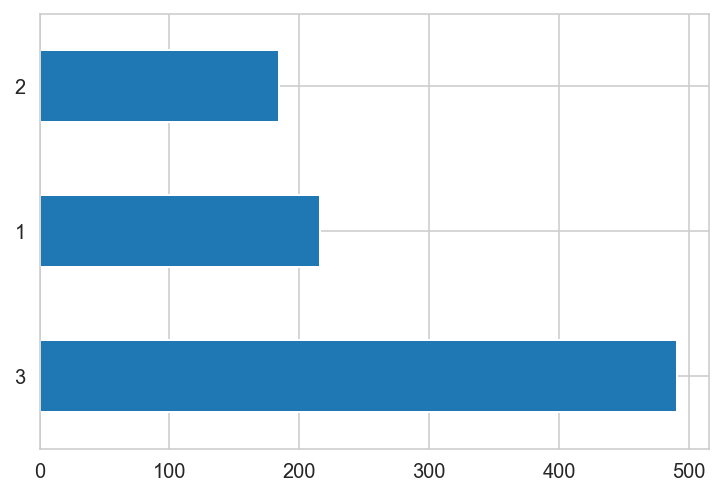

In [114]:
train_data.Pclass.value_counts().plot(kind='barh');  # shows the number of people in each class


2-Test Data

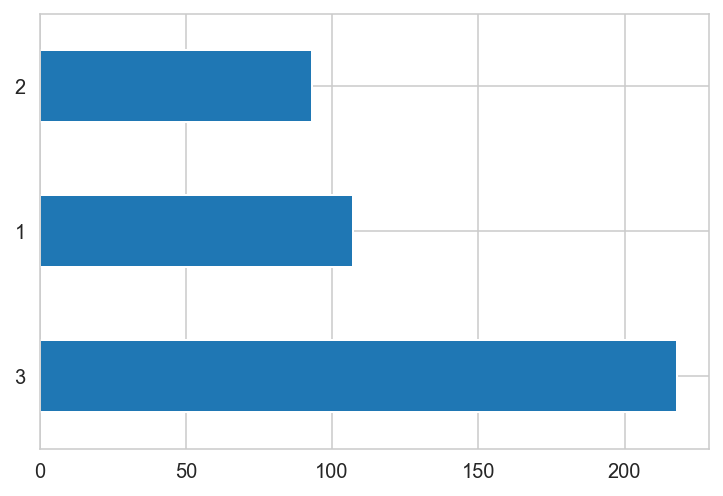

In [115]:
test_data.Pclass.value_counts().plot(kind='barh');  # shows the number of people in each class


**As above char showing a lot of people there were at class 3**

#### Variate Analysis:

In [116]:
# we did that to create the next plot
cn=list(categorical_columns.columns)
for i, column in enumerate(cn): 
    print(i,column)

0 Pclass
1 male
2 Cabin
3 Q
4 S
5 Survived


<AxesSubplot:xlabel='Pclass'>

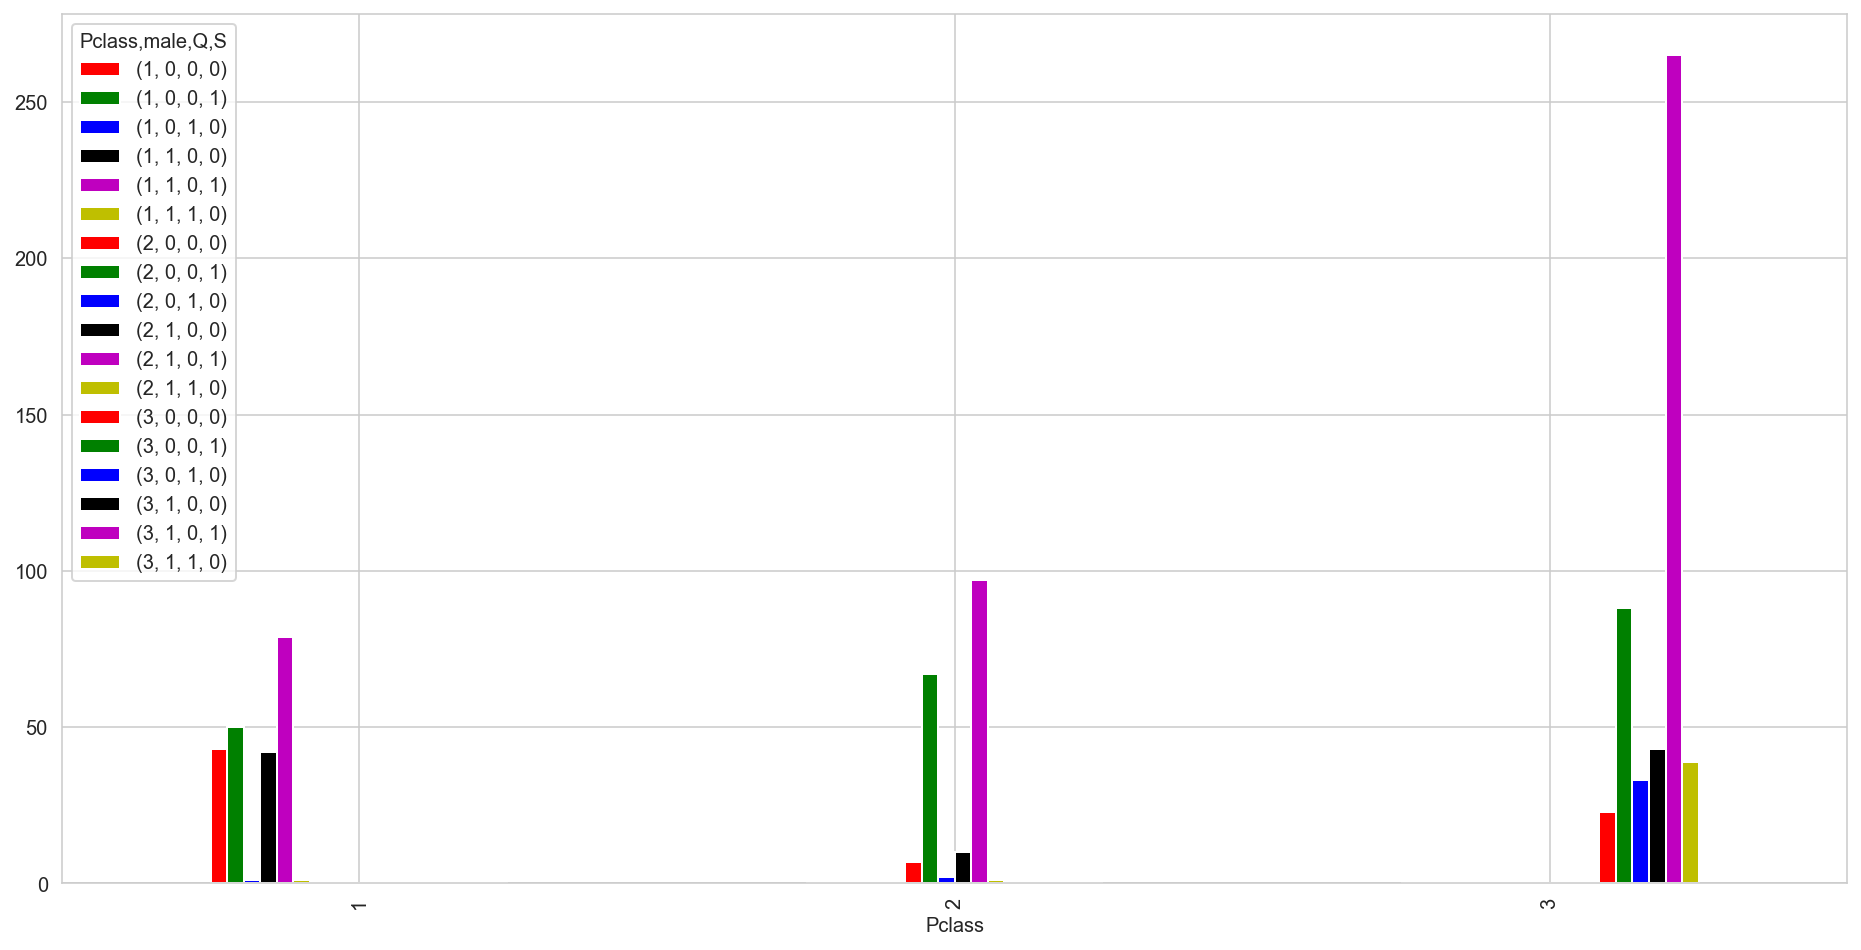

In [117]:
group_counts = categorical_columns.groupby(['Pclass','male','Q','S']).count().reset_index()
# do pivot table
table = pd.pivot_table(group_counts, index='Pclass', columns=['Pclass','male','Q','S'], values='Survived')
# set your own colors here
table.plot(kind='bar', color=['r', 'g', 'b', 'k', 'm', 'y'],figsize=(16,8))
# plt.legend(('1','Beta'), loc='best')

<AxesSubplot:xlabel='Pclass,male,Q,S'>

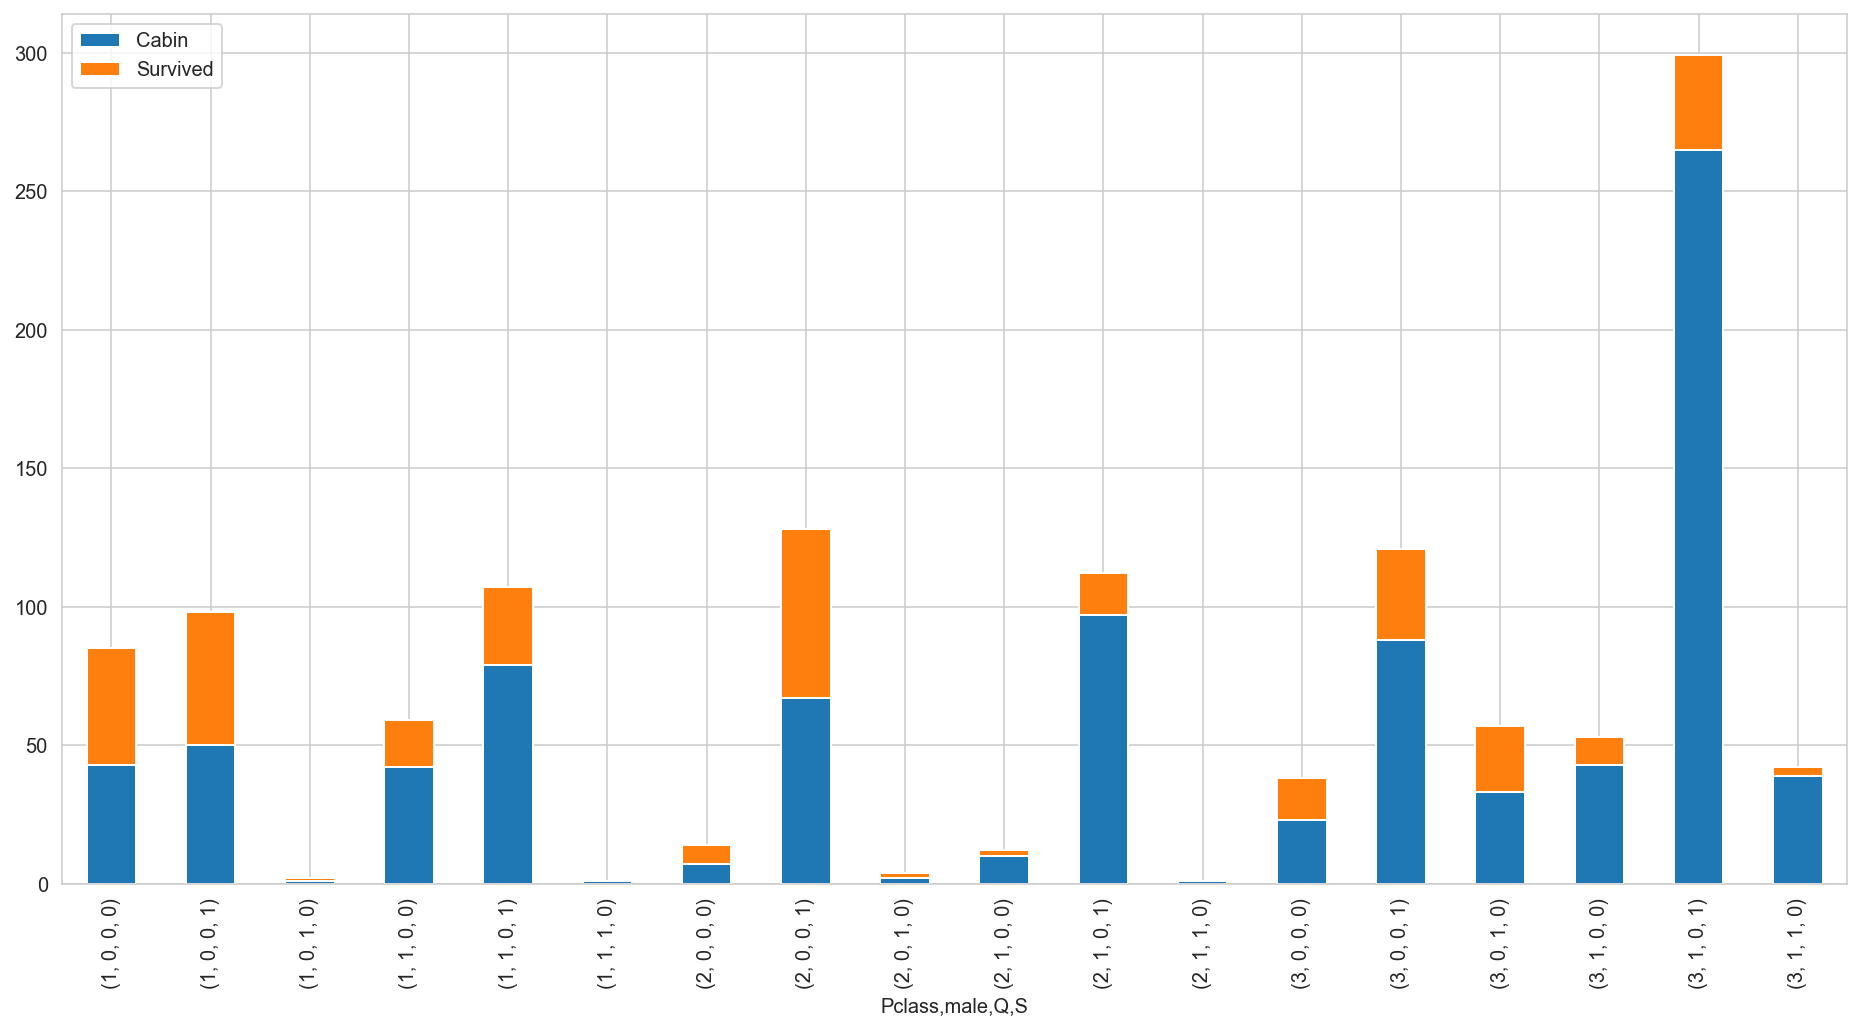

In [118]:
categorical_columns.groupby(['Pclass','male','Q','S']).sum().plot(kind='bar',stacked=True, # using groupby to implement the bar
                                                                            figsize=(16,8))

In [119]:
categorical_columns.groupby(['Pclass','male','Q','S','Cabin']).sum().plot(kind='bar',stacked=True,
                                                                            figsize=(16,8))
plt.title("Number of Survived by Pclass ,Sex ,Cabin, Embarked)

SyntaxError: EOL while scanning string literal (<ipython-input-119-77f3beba2b99>, line 3)

**From all above graphs we can note, the meal at class 1 and Embarked (Q) has least a chance to survive. the women at class 2 has highest chance to survive.**

In [ ]:
#we use a countplot() to see how many people survived and how many died?
train_data['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survived", labelpad=14)
plt.ylabel("Count", labelpad=14);
plt.title("Count the number of Survived Vs Non_Servived people")

**Unfortunately,a lot of people did not survive**

In [ ]:
#we use hue to see which gender survived the most.
f,ax=plt.subplots(1,figsize=(12,8))
sns.countplot('Survived', hue='male',data=train_data,ax=ax)
plt.legend(['female', 'male'])
ax.set_title('Sex V Survived')
plt.show()

**we note the most female survied than male**

In [ ]:
#if people who bought upper class seats survived more than people who bought lower class seats.  
f,ax=plt.subplots(1,figsize=(12,8))
sns.countplot('Survived', hue='Pclass',data=train_data,ax=ax)
plt.legend(['class_1', 'class_2','class_3'])
ax.set_title('Pclass V Survived')
plt.show()

**Based on above chart we can say the people from the upper class (class_1) survived more than other**

#### The linear correlations between the numeric variable

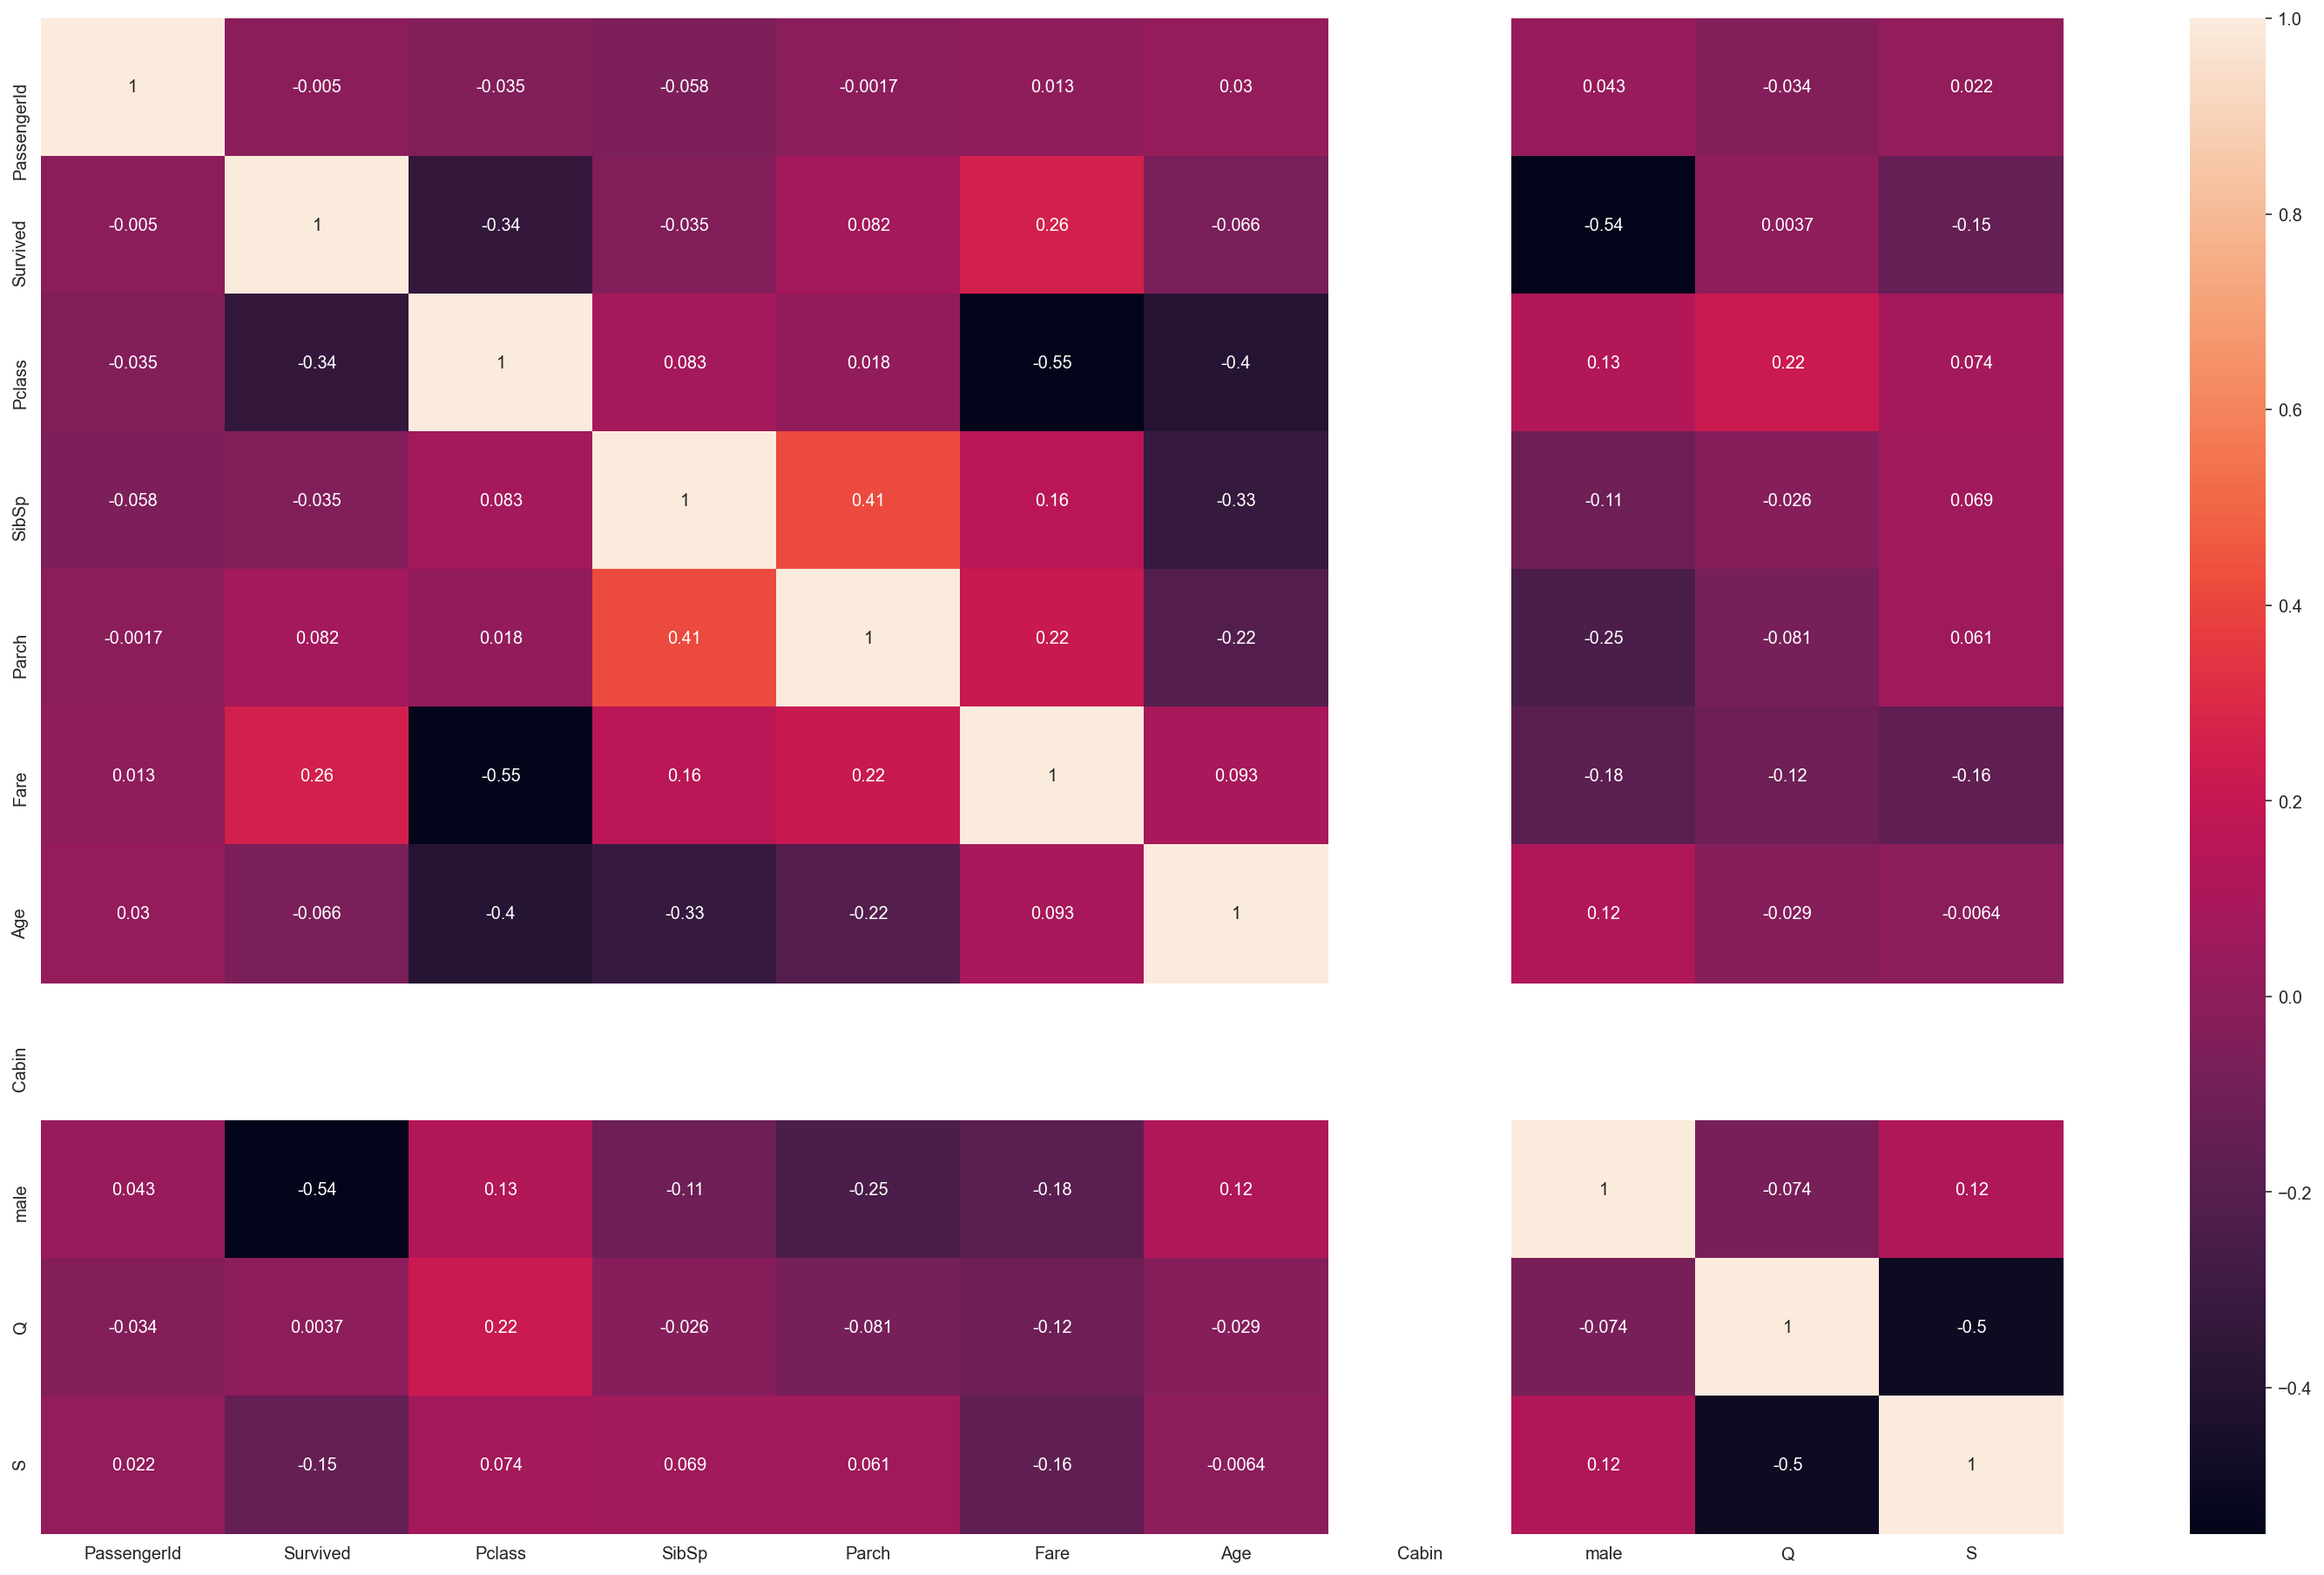

In [128]:
#present the correlation by heatmap
plt.figure(figsize=(26,16))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [130]:
#now assign the value for each X_train_data,y_train_data,X_test_data 
X_train_data=train_data.drop(['PassengerId','Name', 'Ticket', 'Survived'],axis=1) #drop survived because it is a target
#drop 'PassengerId','Name', 'Ticket' columns because they are useless
y_train_data=train_data['Survived']#assign target
X_test_data=test_data.drop(['PassengerId','Name', 'Ticket'],axis=1) #did te same in X_test

### Build a baseline model

In [131]:
print(' baseline model on train data: ')
train_data.Survived.value_counts()/len(train_data.Survived)

 baseline model on train data: 


0    0.616162
1    0.383838
Name: Survived, dtype: float64

---

## Modelling


### 1- Logistic_Regression
##### Pipline includes (Standard_Scaler, Grid_Search, Logistic_Regression)

In [132]:
# Instantiate pipeline object.
lr_pipe2 = Pipeline([
    ('sscaler2', StandardScaler()),#did standerisation to scale the value of features 
    ('logreg2', LogisticRegression(solver='liblinear'))# using LogisticRegression model
])


In [122]:
# Define dictionary of hyperparameters.
pipe_2_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'logreg2__C': [0.1, 0.2,0.3], 
                 'logreg2__fit_intercept': [True, False],
                 'logreg2__penalty': ['l1', 'l2']}

In [133]:
# Instantiate our GridSearchCV object.
pipe_2_gridsearch = GridSearchCV(lr_pipe2, # What is the model we want to fit?
                                 pipe_2_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=0)

In [134]:
pipe_2_gridsearch.fit(X_train_data, y_train_data)# do fit for train data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('logreg2',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logreg2__C': [0.1, 0.2, 0.3],
                         'logreg2__fit_intercept': [True, False],
                         'logreg2__penalty': ['l1', 'l2'],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]})

In [135]:
pipe_2_gridsearch.get_params()# show the parameters that apply

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('sscaler2', StandardScaler()),
  ('logreg2', LogisticRegression(solver='liblinear'))],
 'estimator__verbose': False,
 'estimator__sscaler2': StandardScaler(),
 'estimator__logreg2': LogisticRegression(solver='liblinear'),
 'estimator__sscaler2__copy': True,
 'estimator__sscaler2__with_mean': True,
 'estimator__sscaler2__with_std': True,
 'estimator__logreg2__C': 1.0,
 'estimator__logreg2__class_weight': None,
 'estimator__logreg2__dual': False,
 'estimator__logreg2__fit_intercept': True,
 'estimator__logreg2__intercept_scaling': 1,
 'estimator__logreg2__l1_ratio': None,
 'estimator__logreg2__max_iter': 100,
 'estimator__logreg2__multi_class': 'auto',
 'estimator__logreg2__n_jobs': None,
 'estimator__logreg2__penalty': 'l2',
 'estimator__logreg2__random_state': None,
 'estimator__logreg2__solver': 'liblinear',
 'estimator__logreg2__tol': 0.0001,
 'estimator__logreg2__verbose': 0,
 'estimator__logreg2__warm

In [136]:
pipe_2_gridsearch.best_score_#show the best score

0.7980101688531793

In [137]:
# Print out best estimator. 
pipe_2_gridsearch.best_estimator_#whta is the best pramater that model used??

Pipeline(steps=[('sscaler2', StandardScaler(with_std=False)),
                ('logreg2', LogisticRegression(C=0.1, solver='liblinear'))])

In [138]:
pipe_2_gridsearch_score=pipe_2_gridsearch.score(X_train_data, y_train_data)# show the score
print('pipe_2_gridsearch score in train= ',pipe_2_gridsearch_score)

pipe_2_gridsearch score in train=  0.8080808080808081


In [139]:
pipe_2_gridsearch_predictions_train = pipe_2_gridsearch.predict(X_train_data)# did predicting values in train_data
pipe_2_gridsearch_predictions_test = pipe_2_gridsearch.predict(X_test_data)# did predicting values in test_data

pipe_2_gridsearch_predictions_train #show the list of prediction in train data

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [140]:
print(metrics.accuracy_score(y_train_data, pipe_2_gridsearch_predictions_train))# the accuracy of train data

0.8080808080808081


In [141]:
confusion_matrix = metrics.confusion_matrix(y_train_data,pipe_2_gridsearch_predictions_train)#cofusion matrex
print(confusion_matrix)

[[479  70]
 [101 241]]


In [142]:
print(metrics.classification_report(y_train_data, pipe_2_gridsearch_predictions_train))#print the report that show
#precision,recall ,f1-score and  accuracy

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [143]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
pipe_LR_predictions_df=pd.DataFrame(pipe_2_gridsearch_predictions_test,test_data['PassengerId']).reset_index()
pipe_LR_predictions_df.rename(columns={0:'Survived'}, inplace=True)

pipe_LR_predictions_df.head()# show the dataframe

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [144]:
pipe_LR_predictions_df.to_csv('Pip_LR_MMN.csv',index=False)#save the dataframe as CSV format file to submitted in kaggle

fiiRF_pip_Lr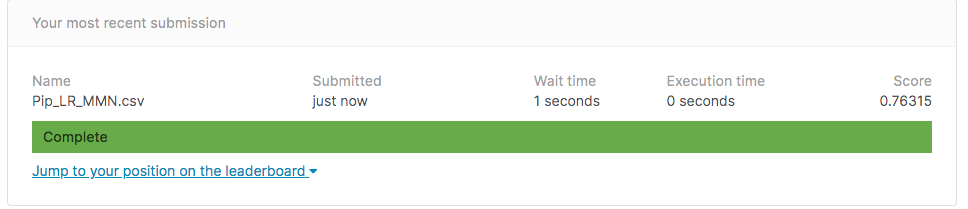

In [145]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_Pip_LR = cross_val_score(pipe_2_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1) 
print("{} {} Score:\t{:0.3} ".format("Logistic_Regression", "Train", s_Pip_LR.mean().round(3)))

Logistic_Regression Train Score:	0.792 


### 2- K_Near_Neighbors_Classifier(Knn)
##### Pipline includes (Standard_Scaler, Grid_Search, Knn)

In [146]:
# Instantiate pipeline object.
# we applied the same strategy for all models that used 
pipeline = Pipeline([('standardscaler', StandardScaler()),#did standerisation to scale the value of features
                     ('kbest', SelectKBest()),
                     ('Classifier',  KNeighborsClassifier())])## using KNeighborsClassifier model

parameters = {
                 'standardscaler__with_std': [True, False],
                'standardscaler__with_mean': [True, False],
    'kbest__k':  list(range(1, X_train_data.shape[1]+1)),#use differnt number of Kbest from 1-9
              'Classifier__n_neighbors': list(range(1,21))}# use differnt number of neighbors from 1-21


pipe_grid_knn = GridSearchCV(pipeline, parameters, cv=10, scoring="accuracy")# set grid_search

pipe_grid_knn.fit(X_train_data, y_train_data)# did fit for train_data with knn model


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kbest', SelectKBest()),
                                       ('Classifier', KNeighborsClassifier())]),
             param_grid={'Classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20],
                         'kbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='accuracy')

In [147]:
pipe_grid_knn.get_params()#show the parameter that applied 

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('kbest', SelectKBest()),
  ('Classifier', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__kbest': SelectKBest(),
 'estimator__Classifier': KNeighborsClassifier(),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__kbest__k': 10,
 'estimator__kbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'estimator__Classifier__algorithm': 'auto',
 'estimator__Classifier__leaf_size': 30,
 'estimator__Classifier__metric': 'minkowski',
 'estimator__Classifier__metric_params': None,
 'estimator__Classifier__n_jobs': None,
 'estimator__Classifier__n_neighbors': 5,
 'estimator__Classifier__p': 2,
 'estimator__Classifier__weights': 'uniform',
 'estimator': Pipeline(steps=[('s

In [148]:
pipe_grid_knn.best_score_#show best score

0.8294132334581772

In [149]:
# Print out best estimator.
pipe_grid_knn.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kbest', SelectKBest(k=7)),
                ('Classifier', KNeighborsClassifier(n_neighbors=15))])

In [150]:
pipe_grid_knn_score=pipe_grid_knn.score(X_train_data, y_train_data)# the score of train_data
print('pipe_grid_knn score in train= ',pipe_grid_knn_score)

pipe_grid_knn score in train=  0.8271604938271605


In [151]:
#do the prediction for both train and test data
pipe_grid_knn_predictions_train = pipe_grid_knn.predict(X_train_data)
pipe_grid_knn_predictions_test = pipe_grid_knn.predict(X_test_data)

pipe_grid_knn_predictions_train# this is the array of prediction values in train data

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [152]:
print(metrics.accuracy_score(y_train_data, pipe_grid_knn_predictions_train))#print the accuracy

0.8271604938271605


In [153]:
confusion_matrix = metrics.confusion_matrix(y_train_data,pipe_grid_knn_predictions_train)#show the matrics
print(confusion_matrix)

[[495  54]
 [100 242]]


In [154]:
print(metrics.classification_report(y_train_data, pipe_grid_knn_predictions_train))#print the report to see 
#recall, f1-score and accuracy in prediction train_data

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       549
           1       0.82      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.83      0.83      0.82       891



In [155]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
pipe_knn_predictions_df=pd.DataFrame(pipe_grid_knn_predictions_test,test_data['PassengerId']).reset_index()
pipe_knn_predictions_df.rename(columns={0:'Survived'}, inplace=True)

pipe_knn_predictions_df.head()# show the head of new dataframe

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [156]:
pipe_knn_predictions_df.to_csv('Pip_knn_MMN.csv',index=False)#save the dataframe as CSV format file to submitted in kaggle

fiiRF_pip_knn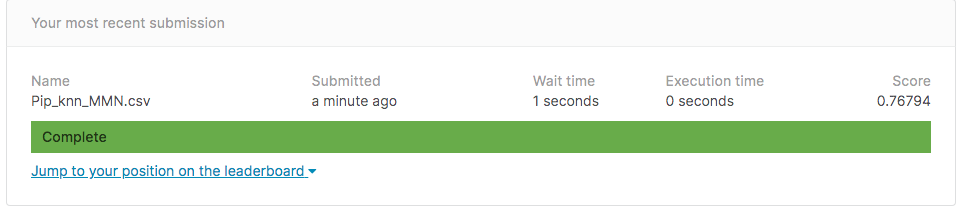

In [157]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_Pip_Knn = cross_val_score(pipe_grid_knn, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("KNeighborsClassifier", "Train", s_Pip_Knn.mean().round(3)))

KNeighborsClassifier Train Score:	0.811 


### 3-Extra_Tree_Classifier
##### Pipline includes (Standard_Scaler, Grid_Search, Extra_Tree)

In [158]:
# Instantiate pipeline object.
ET_pipe = Pipeline([
    ('sscaler2', StandardScaler()),#did standerisation to scale the value of features
    ('ET_C',  ExtraTreesClassifier())# using ExtraTreesClassifier model
])

In [159]:

pipe_et_params = {
                 'sscaler2__with_std': [True, False],
                'sscaler2__with_mean': [True, False],
    'ET_C__n_estimators': [10, 50, 100, 200],
    'ET_C__max_features':[2, 3, 5, 7, 8,9],
    'ET_C__max_depth': [1, 2, 3, 4, 5, 8],
    'ET_C__criterion':['gini', 'entropy'],}


In [160]:
# Instantiate our GridSearchCV object.
pipe_et_gridsearch = GridSearchCV(ET_pipe, # What is the model we want to fit?
                                 pipe_et_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)


In [161]:
# Fit the GridSearchCV object to the train_data.
pipe_et_gridsearch.fit(X_train_data, y_train_data);


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5760 out of 5760 | elapsed: 19.3min finished


In [162]:
print('The best score' ,pipe_et_gridsearch.best_score_)#print the best score

The best score 0.8272110978595192


In [121]:
#print the score
print('The score after GridSearch',pipe_et_gridsearch.score(X_train_data, y_train_data))

The score after GridSearch 0.8316498316498316


In [163]:
print('the best parameters :',pipe_et_gridsearch.best_estimator_)# Print out best estimator.

the best parameters : Pipeline(steps=[('sscaler2', StandardScaler(with_mean=False)),
                ('ET_C',
                 ExtraTreesClassifier(max_depth=8, max_features=8,
                                      n_estimators=50))])


In [164]:
trainpredect_et=pipe_et_gridsearch.predict(X_train_data)#do the prediction for  train data

In [165]:
testpred_et= pipe_et_gridsearch.predict(X_test_data)#do the prediction for  test data

In [166]:
print(metrics.accuracy_score(y_train_data, trainpredect_et))#print the accuracy

0.9012345679012346


In [167]:
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpredect_et)

In [168]:
print(confusion_matrix)#show the matrics

[[536  13]
 [ 75 267]]


In [169]:
print(metrics.classification_report(y_train_data, trainpredect_et))#print the report to see 
#recall, f1-score and accuracy in prediction train_data
trainpredect_et

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       549
           1       0.95      0.78      0.86       342

    accuracy                           0.90       891
   macro avg       0.92      0.88      0.89       891
weighted avg       0.91      0.90      0.90       891



array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [172]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
ET_predictions_df=pd.DataFrame(testpred_et,test_data['PassengerId']).reset_index()
ET_predictions_df.rename(columns={0:'Survived'}, inplace=True)
ET_predictions_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [173]:
#save the dataframe as CSV format file to submitted in kaggle
ET_predictions_df.to_csv('FillRF_ET_MMN.csv',index=False)

fillRF_pip_et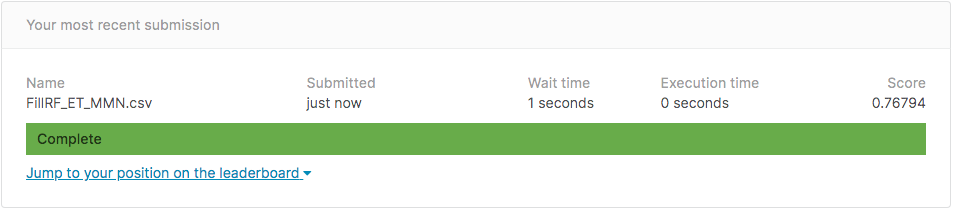

In [174]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
s_ET = cross_val_score(pipe_et_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format(" Extra Tree ", "Train", s_ET.mean().round(3)))

 Extra Tree  Train Score:	0.813 


### 4-Random Forest Classifier
##### Pipline includes (Standard_Scaler, Grid_Search, Random Forest)

In [175]:
rf_pipe = Pipeline([('sscaler', StandardScaler()),('randomForest', RandomForestClassifier())])
#inisalize StandardScaler() and Random Forest Classifier in Pipeline


In [176]:
# Define dictionary of hyperparameters.
pipe_2_params = {'sscaler__with_mean': [True, False], 
                 'sscaler__with_std': [True, False],
                'randomForest__max_features':[2, 3, 5, 7, 8,9],
                'randomForest__max_depth': [1, 2, 3, 4, 5, 8],
                'randomForest__bootstrap':[True, False]}

In [177]:
pipe_rf_gridsearch = GridSearchCV(rf_pipe, # What is the model we want to fit?
                                 pipe_2_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [178]:
pipe_rf_gridsearch.fit(X_train_data, y_train_data);# do fit for train_data

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  6.3min finished


In [179]:
pipe_rf_gridsearch.best_estimator_ # show the best estimator parameter that used in fit

Pipeline(steps=[('sscaler', StandardScaler(with_mean=False)),
                ('randomForest',
                 RandomForestClassifier(max_depth=8, max_features=3))])

In [180]:
print(f'The best score{pipe_rf_gridsearch.best_score_}')# show the best score
print(f'The score after GridSearch{pipe_rf_gridsearch.score(X_train_data, y_train_data)}')#show the score of train-data
print(f'the best parameters :{pipe_rf_gridsearch.best_params_}')#print the best parameter

The best score0.8339401167534994
The score after GridSearch0.9113355780022446
the best parameters :{'randomForest__bootstrap': True, 'randomForest__max_depth': 8, 'randomForest__max_features': 3, 'sscaler__with_mean': False, 'sscaler__with_std': True}


In [181]:
#prediction for the best model in pred_dt_best on Train data
trainpred_Prf_best=pipe_rf_gridsearch.predict(X_train_data)
#prediction for the best model in pred_dt_best on Test data
testpred_Prf_best= pipe_rf_gridsearch.predict(X_test_data)

In [182]:
#confusion matrix and classification reports for (best) Decision Tree Classifier for Train data
print('confusion matrix for best Random Forest pipe')
confusion_matrix = metrics.confusion_matrix(y_train_data, trainpred_Prf_best)
print(confusion_matrix)
print('classification report for best Random Forest pipe')
print(metrics.classification_report(y_train_data, trainpred_Prf_best))

confusion matrix for best Random Forest pipe
[[532  17]
 [ 62 280]]
classification report for best Random Forest pipe
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       549
           1       0.94      0.82      0.88       342

    accuracy                           0.91       891
   macro avg       0.92      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891



In [183]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
best_Prf_df=pd.DataFrame(testpred_Prf_best,test_data['PassengerId']).reset_index()
best_Prf_df.rename(columns={0:'Survived'}, inplace=True)
best_Prf_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [184]:
best_Prf_df.to_csv('Best_Prf_usingRFfill_MMN.csv',index=False)#save the dataframe as CSV file to send it to kaggle

fillRF_pip_RF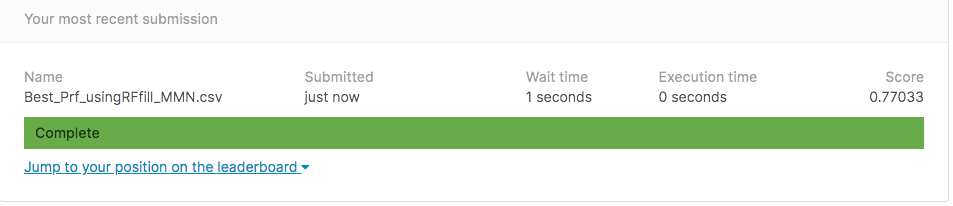

In [185]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
best_Prf_CV = cross_val_score(pipe_rf_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best Random Forest", "Train", best_Prf_CV.mean().round(3)))

Best Random Forest Train Score:	0.811 


### 5-Decision_Tree_Classifier
##### Pipline includes (Standard_Scaler, Grid_Search, DecisionTreeClassifier)

In [187]:
#inisalize StandardScaler() and Decision Tree Classifie in Pipeline
tr_pipe = Pipeline([('sscaler', StandardScaler()),('DT',DecisionTreeClassifier() )])

In [188]:
# Define dictionary of hyperparameters.
pipe_dt_params = {'sscaler__with_mean': [True, False], 
                 'sscaler__with_std': [True, False],
                'DT__max_features':[2, 3, 5, 7, 8,9],
                'DT__max_depth': [1, 2, 3, 4, 5, 8],
                'DT__criterion':['gini', 'entropy']}

In [189]:
pipe_dt_gridsearch = GridSearchCV(tr_pipe, # What is the model we want to fit?
                                 pipe_dt_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [190]:
pipe_dt_gridsearch.fit(X_train_data, y_train_data);# fit train_data

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:   18.9s finished


In [191]:
pipe_dt_gridsearch.best_estimator_# print the best estimator 

Pipeline(steps=[('sscaler', StandardScaler(with_mean=False, with_std=False)),
                ('DT',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        max_features=8))])

In [192]:
print('The best score' ,pipe_dt_gridsearch.best_score_)#print the best score
print('The score after GridSearch',pipe_dt_gridsearch.score(X_train_data, y_train_data))#print the score of train_data
print('the best parameters :',pipe_dt_gridsearch.best_params_)#print the best_params_ that used in fit

The best score 0.8182097796748478
The score after GridSearch 0.8484848484848485
the best parameters : {'DT__criterion': 'entropy', 'DT__max_depth': 5, 'DT__max_features': 8, 'sscaler__with_mean': False, 'sscaler__with_std': False}


In [193]:
#prediction for the best model in pred_dt_best on Train data
trainpred_dt_best=pipe_dt_gridsearch.predict(X_train_data)
#prediction for the best model in pred_dt_best on Test data
testpred_dt_best= pipe_dt_gridsearch.predict(X_test_data) 

In [194]:
testpred_dt_best #print the predect test array

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [196]:
#create dataframe that hold the PassengerId and predictions_test in order to send it to kaggle 
best_dt_df=pd.DataFrame(testpred_dt_best,test_data['PassengerId']).reset_index()
best_dt_df.rename(columns={0:'Survived'}, inplace=True)
best_dt_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [197]:
best_dt_df.to_csv('Best_dt_usingRFfill_MMN.csv',index=False)#save the dataframe as CSV file to send it to kaggle

fillRF_pip_dt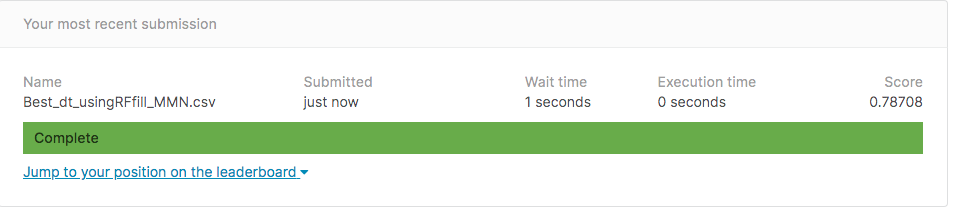

In [198]:
#Because we applied Grid_search so,we need to do Cross_Validation and take the mean of all scores 
best_dt_CV = cross_val_score(pipe_dt_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Best DT", "Train", best_dt_CV.mean().round(3)))

Best DT Train Score:	0.78 


## Conclusion

In [199]:
# we did a dataframe named 'model_df' that conclude the result of each model to make easy comparing between them
model_Table = {'Model':  ['Logistic_Regression', 'Knn-Classifier',# model names
                          'Extra-Tree','Random-Forest','Decision-Tree'],
               'Train_Score': [0.808, 0.8271,0.8316,0.9113,0.8484],
               'Test_Score': [0.7631, 0.7679,0.7679,0.7703,0.7870],
               'Train_Cross_Validation_Score': [0.792 , 0.811 ,0.813,0.811,0.78]
               }

model_df = pd.DataFrame (model_Table, columns = ['Model','Train_Score','Test_Score','Train_Cross_Validation_Score'])

model_df.head(6)
#print(model_df)

,Model,Train_Score,Test_Score,Train_Cross_Validation_Score
0,Logistic_Regression,0.8080,0.7631,0.792
1,Knn-Classifier,0.8271,0.7679,0.811
2,Extra-Tree,0.8316,0.7679,0.813
3,Random-Forest,0.9113,0.7703,0.811
4,Decision-Tree,0.8484,0.7870,0.780


This table helps us to abestract our work and reach the result in the perfect way. we obserived that the best score we got in test score is '0.7870'. this score was recorded in `Decision-Trees`.
In addition, this score as we learn in our couse is very good and it indicates that the model did prefectly because if the score nearly to 9 or 1 that mean it has overfit and if the score under 6 or 5 that means the model has bias. So, we got score in the safe and excellent way.